<a href="https://colab.research.google.com/github/Levittt/squidgame_analysis/blob/master/Squid_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

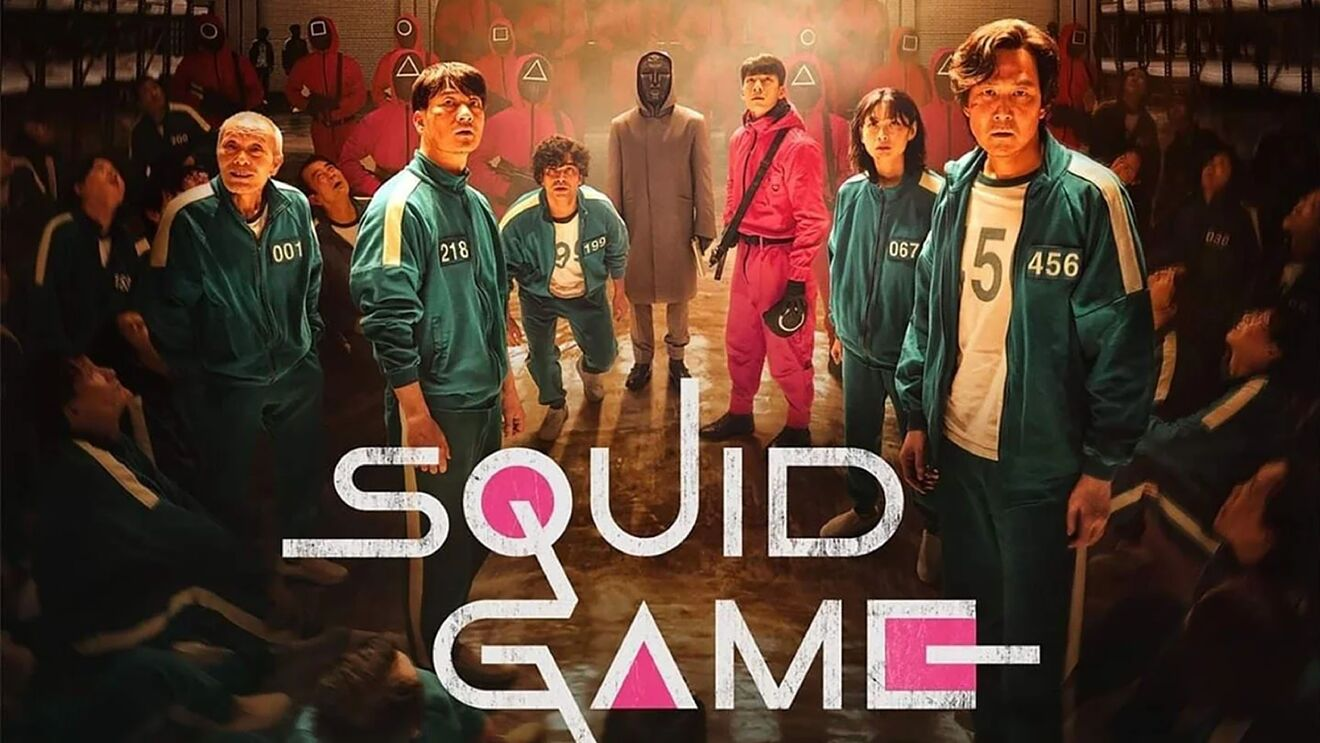




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd 
import csv

# Squid game - чистка датасета

In [ ]:
#датасет взят из: https://www.kaggle.com/deepcontractor/squid-game-netflix-twitter-data

df = pd.read_csv('https://raw.githubusercontent.com/Levittt/NMSTU_competition_datasets/main/tweets_v8.csv')

pd.set_option("display.max.columns", None)

df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,False,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,False
6,Aeriaaaa♡,NaN,Fujoshi 🙈/ Thai BL-obsessed/Always distracted ...,2021-06-01 14:08:10+00:00,14,110,518,False,2021-10-06 12:04:45+00:00,@B_hundred_Hyun pls use that gun on me. 😩 \n\n...,Twitter for Android,False
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,False,2021-10-06 12:04:26+00:00,Please vote in my daily poll. \nThanks. 😊\n\nD...,Twitter for iPhone,False
8,Joel D. Parker,NaN,Ph.D. in history of 20th century Levant. Somet...,2010-07-01 07:26:44+00:00,621,1346,5345,False,2021-10-06 12:04:22+00:00,I've seen bi-lingual Korean speakers slam the ...,Twitter Web App,False
9,Kevin Franco,"Calgary, Canada",When it comes to describing myself in a one li...,2009-05-11 20:14:51+00:00,1027,278,20902,False,2021-10-06 12:04:10+00:00,I discovered English audio after 5 episodes of...,Twitter Web App,False


In [ ]:
df.shape

(80019, 12)

In [ ]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
source              object
is_retweet            bool
dtype: object

In [ ]:
df.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [ ]:
del df['source']
del df['user_favourites']
del df['user_description']
del df['user_created']
del df['user_verified']
del df['user_friends']


In [ ]:
import re
for i in range(0,len(df['text']),1):
  if '\n' in df['text'][i]:
    df['text'][i] = re.sub('\n','',df['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.dropna(axis = 0, how='any', inplace=True)
df.describe()

In [ ]:
df.head(10)

,user_name,user_location,user_followers,date,text,is_retweet
3,YoMo.Mdp,Any pronouns,3,2021-10-06 12:05:04+00:00,//Blood on 1st slideI'm joining the squidgame ...,False
4,Laura Reactions,France,330,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",False
5,Peyman 🅚🅐🅘,United Kingdom,546,2021-10-06 12:04:54+00:00,$THGGoing to explode to 4B Marketcap very soon...,False
7,BarBiE Fábregas 🇿🇦,South Africa,1877,2021-10-06 12:04:26+00:00,Please vote in my daily poll. Thanks. 😊Do you ...,False
9,Kevin Franco,"Calgary, Canada",1027,2021-10-06 12:04:10+00:00,I discovered English audio after 5 episodes of...,False
10,TreasureTress,London,1934,2021-10-06 12:03:56+00:00,The struggle is VERY real 👀 #SquidGame https:/...,False
11,soph 🍁,arlor • ddgc,371,2021-10-06 12:03:34+00:00,— squid game (2021): deaths and foreshadowing ...,False
14,Yemzxy,"Lagos, Nigeria",39,2021-10-06 12:02:57+00:00,The saga continues Get data cheap @honourworl...,False
15,kim joo ryoung pics,fan acc | she/her🦑,698,2021-10-06 12:02:52+00:00,naur she's just purely a cutie&lt;333 #squidg...,False
16,Geriatrixx,Montreal,234,2021-10-06 12:02:52+00:00,Dunno what everyone's going crazy about #Squid...,False


In [ ]:
for i in range(0,len(df['date']),1):
  try:
    temp = df['date'][i].split('+',2)
    df['date'][i] = temp[0]
  except KeyError as err:
    continue
df.head(10)

In [ ]:
df.head(10)

,user_name,user_location,user_followers,date,text,is_retweet
3,YoMo.Mdp,Any pronouns,3,2021-10-06 07:05:04-05:00,//Blood on 1st slideI'm joining the squidgame ...,False
4,Laura Reactions,France,330,2021-10-06 07:05:00-05:00,"The two first games, players were killed by th...",False
5,Peyman 🅚🅐🅘,United Kingdom,546,2021-10-06 07:04:54-05:00,$THGGoing to explode to 4B Marketcap very soon...,False
7,BarBiE Fábregas 🇿🇦,South Africa,1877,2021-10-06 07:04:26-05:00,Please vote in my daily poll. Thanks. 😊Do you ...,False
9,Kevin Franco,"Calgary, Canada",1027,2021-10-06 07:04:10-05:00,I discovered English audio after 5 episodes of...,False
10,TreasureTress,London,1934,2021-10-06 07:03:56-05:00,The struggle is VERY real 👀 #SquidGame https:/...,False
11,soph 🍁,arlor • ddgc,371,2021-10-06 07:03:34-05:00,— squid game (2021): deaths and foreshadowing ...,False
14,Yemzxy,"Lagos, Nigeria",39,2021-10-06 07:02:57-05:00,The saga continues Get data cheap @honourworl...,False
15,kim joo ryoung pics,fan acc | she/her🦑,698,2021-10-06 07:02:52-05:00,naur she's just purely a cutie&lt;333 #squidg...,False
16,Geriatrixx,Montreal,234,2021-10-06 07:02:52-05:00,Dunno what everyone's going crazy about #Squid...,False


In [ ]:
from datetime import date
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True)
df['date'] = df['date'].dt.tz_convert('Etc/GMT+5')

In [ ]:
df.dtypes

user_name                            object
user_location                        object
user_followers                        int64
date              datetime64[ns, Etc/GMT+5]
text                                 object
is_retweet                             bool
dtype: object

In [ ]:
array2 = df['is_retweet'].tolist()
test2 = Counter(array2)
print(test2)

Counter({False: 56149})


In [ ]:
#Сохраняю, потом продолжу
filename = 'squid_game'
data = pd.DataFrame(df, columns=['user_name', 'user_location','user_followers','date', 'text', 'is_retweet'])
data.to_parquet(filename+'.pqt', index=False)

# Топ-10 активных комментаторов

In [ ]:
#Вы можете взять промежуточный файл squid_game.pqt здесь: https://github.com/Levittt/NMSTU_competition_datasets/blob/main/squid_game.pqt
#Подключите его или из своего диска или из сессионнго хранилища
df_pqt = pd.read_parquet('/content/drive/My Drive/ds/squid_game.pqt')
type(df_pqt)
df_pqt.head(5)

In [ ]:
top_active = df_pqt['user_name'].value_counts(sort=True)
top_active.head(10)

Sale X Low                                  395
John Doge                                   263
Ofofonobs                                   140
$200 Minimum Stupid Argument Fee             88
marziolowe                                   82
Keliɑh Sɑid Do Not @ Me Unless You Bɑthe     79
.                                            76
Crypto Mushroomz                             70
👑 Olivia 👑                                   69
Kyla Sylvers                                 69
Name: user_name, dtype: int64

In [ ]:
#есть еще такой вариант
from collections import Counter
users = df_pqt['user_name'].tolist()
top_active = Counter(users)
print(top_active)


Counter({'Sale X Low': 395, 'John Doge': 263, 'Ofofonobs': 140, '$200 Minimum Stupid Argument Fee': 88, 'marziolowe': 82, 'Keliɑh Sɑid Do Not @ Me Unless You Bɑthe': 79, '.': 76, 'Crypto Mushroomz': 70, 'Kyla Sylvers': 69, '👑 Olivia 👑': 69, '✨🍂𑁍︎𝒆𝒍𝒍𝒂☁︎ 🌙': 68, 'MLN PXL': 57, 'Yves Haint Laurent': 54, 'Netflix Updates': 52, '🌈🍳\U0001f9cb the eggcademic (she/her/她)': 49, 'jeets (Jason Thomas Scott)': 42, 'Cryptofreak': 41, 'ꕥ': 38, 'VaXXtina Modernara': 38, 'KBIZoom': 37, 'Daily Express': 37, '❁☁︎𝒆𝒍𝒍𝒂☁︎❁J-41': 37, 'Town Post': 36, '2022 Superbowl Champions New Orleans Saints': 36, 'Woody': 36, 'Gabby': 36, 'WINK_PANDA': 36, 'Korea Odyssey': 34, 'Son of Coul 🇺🇸 🇫🇷 Ciné & Séries 🎦 📺': 34, 'bettina stan account': 34, 'TOXIC, BOUJEE, AND ROWDY 😈': 34, 'Noah Vusser': 34, 'Crypto Chief': 34, 'Shotta Biggz': 34, 'Tatum': 34, 'ʟᴀᴜ \U0001fa90': 33, "mik '◡' || no more jiwoo solo💔😡": 33, 'PJD Printing': 32, 'monkeypim': 32, 'ellie 🌸🔞 | blogger & bad b*tch': 31, '✨🍂𑁍︎𝒔𝒑𝒐𝒐𝒌𝒚 𝒆𝒍𝒍𝒂☁︎ 🌙': 31, 'NFTMOGUL

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128081 missing from current font.
  font.set_text(s, 0, flags=flags)


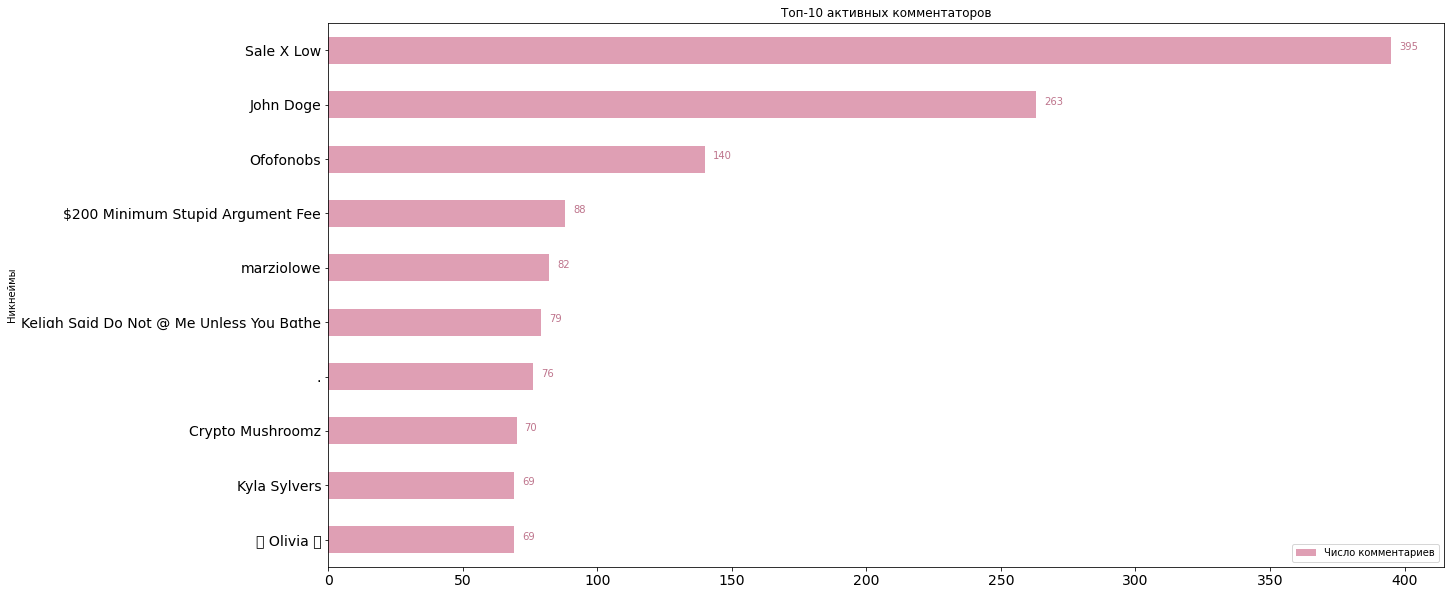

In [ ]:
data = {'Никнеймы': [
          '👑 Olivia 👑', 'Kyla Sylvers', 'Crypto Mushroomz', '.', 'Keliɑh Sɑid Do Not @ Me Unless You Bɑthe',  
          'marziolowe', '$200 Minimum Stupid Argument Fee', 'Ofofonobs', 'John Doge', 'Sale X Low'], 
        'Число комментариев': [69, 69, 70, 76, 79, 82, 88, 140, 263, 395]}
        
to_hist = pd.DataFrame(data = data)

ax = to_hist.plot(kind='barh', x='Никнеймы', y='Число комментариев', color='#DF9FB4', title='Топ-10 активных комментаторов', figsize=(20,10), fontsize=14)
for i, v in enumerate(data['Число комментариев']):
    ax.text(v + 3, i , str(v), color='#BE748C')


# Поиск самых обсуждаемых персонажей сериала

In [ ]:
for i in range(0, len(df_pqt['text']),1):
  df_pqt['text'][i] = df_pqt['text'][i].lower()

In [ ]:
keywords = [
              'gi-hun 456',
              'sang-woo 218', 
              'sae-byeok 067', 
              'il-nam 001', 
              'grandpa granddad',
              'deok-su 101', 
              'mi-nyeo 212', 
              'abdul 199',
              'ji-yeong 240', 
              'jun-ho',
              'byeong-ki', 
              'frontman', 
              'salesman'
              ] 
               
               
def check_name(keywrd):
  keywrd = keywrd.split(' ')

  sum = 0

  #если рядом с именем стоял номер игрока, пользуемся Исключающим ИЛИ: считаем сумму, если в строке есть только имя или только номер игрока
  #keywrd[0] - имя игрока, keywrd[1] - номер игрока
  if len(keywrd) > 1:
    for i in df_pqt['text']:
      if ((keywrd[0] in i) and (keywrd[1] not in i)) :
        sum+=1
      if ((keywrd[1] in i) and (keywrd[0] not in i)): 
        sum+=1
      else:
        continue
  
  #если у игрока нет номера
  else:
     for i in df_pqt['text']:
       if keywrd[0] in i:
         sum+=1

  #функция возвращает пару {имя : сумма}
  return {keywrd[0] : sum}

In [ ]:
from multiprocessing import Pool, cpu_count
from time import time, sleep

characters_mention = []

#мультипроцессорная обработка, используем для параллельного выполнения функции между несколькими входами
with Pool(cpu_count()) as p:
      start = time()
      results = p.map(check_name, keywords)
      characters_mention.extend(results)
      p.close()
      p.join()
      print(f"Время проверки имён {time() - start} с.") 

# il-nam и grandpa - это один и тот же человек, но его по-разному называют. Поэтому следует сложить результаты il-nam + grandpa
mentions = {}
for i in characters_mention: 
  for key, val in i.items(): 
      mentions.update({key:val})
mentions['il-nam'] = mentions['il-nam'] + mentions['grandpa']
del mentions['grandpa']

Время проверки имён 0.31330227851867676 с.


In [ ]:
print(mentions)

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/7821472"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''') 

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/7873622"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
from PIL import Image
import plotly.graph_objects as go
import requests

fig = go.Figure(data=[go.Scatter(
    x=[6, 6, 40, 82, 89, 118, 163, 196, 202, 303, 337, 398],
    y=[1, 2, 3, 4, 5,  6, 7, 8, 9, 10, 11, 12], 
    text = ['Salesman<br>Число комментариев: 6', 'Jun-ho<br>Число комментариев: 6', 'Frontman<br>Число комментариев: 40', 'Ji-Yeong<br>Число комментариев: 82',
            'Mi-nyeo<br>Число комментариев: 89',  'Deok-su<br>Число комментариев: 118', 'Sang-woo<br>Число комментариев: 163', 
            'Abdul<br>Число комментариев: 196', 'Byeong-ki<br>Число комментариев: 202', 'Sae-byeok<br>Число комментариев: 303', 'il-nam<br>Число комментариев: 337', 'Gi-hun<br>Число комментариев: 398'],
    mode='markers',
    marker_size=80)
                    ])

name = ['https://www.looper.com/img/gallery/the-jun-ho-theory-that-would-change-squid-game-forever/l-intro-1633984927.jpg','https://static2.srcdn.com/wordpress/wp-content/uploads/2021/09/Squid-Game-Workers.jpg', 'https://johnhockenberry.com/ru/wp-content/uploads/sites/7/2021/10/SquidGame_Unit_107_0295.jpg',
        'https://i.pinimg.com/originals/64/03/b5/6403b57d0af9d55e2c0ad5db009c4344.jpg', 'https://mediaproxy.salon.com/width/1200/https://media.salon.com/2021/10/squid-game-still04.jpg', 'https://preview.redd.it/hvqurosclts71.jpg?width=640&crop=smart&auto=webp&s=d38b8ae082744d99c7fb8f88a7a6f081bf7d903b', 
        'https://thecinemaholic.com/wp-content/uploads/2021/09/Squid-Game-jhvyte5rt.jpg','https://images.news18.com/ibnlive/uploads/2021/10/anupam-tripathi-16338386233x2.jpg?im=Resize,width=360,aspect=fit,type=normal?im=Resize,width=320,aspect=fit,type=normal', 'https://cdn.superaficionados.com/imagenes/7-personajes-de-squid-game-el-juego-del-calamar-byeong-ki-1-cke.jpg',
        'https://i.insider.com/615d7c3e1725d20018b7fe7b?width=1136&format=jpeg', 'https://fashionbehindthescene.com/wp-content/uploads/2021/10/%E2%80%98Squid-Game-Who-Is-the-Actor-Who-Plays-Oh-Il-Nam-Player-001-in-the-K-Drama.jpg', 'https://www.looper.com/img/gallery/the-ending-of-squid-game-season-1-explained/l-intro-1632168234.jpg']


for i in range(0,11,1):
  fig.add_layout_image(
      dict(
      source=Image.open(requests.get(name[i], stream=True).raw),
      xref="x",
      yref="y",
      xanchor="center",
      yanchor="middle",
      sizing="contain",
      opacity=0.8,
      layer="above"
      ))
  
fig.update_layout(height=1000, width=1800,
                  title_text="Топ-10 активных комментаторов",
                  yaxis_range=[0,14],
                  template='ggplot2')
fig.show()

# Местоположение комментаторов

In [ ]:
df_pqt = pd.read_parquet('/content/drive/My Drive/ds/squid_game.pqt') 
#Тут уже готовый: df_pqt = pd.read_parquet('/content/drive/My Drive/ds/squid_game_countries.pqt')
type(df_pqt)
df_pqt.head(5)

,user_name,user_location,user_followers,date,text,is_retweet
0,YoMo.Mdp,Any pronouns,3,2021-10-06 07:05:04-05:00,//Blood on 1st slideI'm joining the squidgame ...,False
1,Laura Reactions,France,330,2021-10-06 07:05:00-05:00,"The two first games, players were killed by th...",False
2,Peyman 🅚🅐🅘,United Kingdom,546,2021-10-06 07:04:54-05:00,$THGGoing to explode to 4B Marketcap very soon...,False
3,BarBiE Fábregas 🇿🇦,South Africa,1877,2021-10-06 07:04:26-05:00,Please vote in my daily poll. Thanks. 😊Do you ...,False
4,Kevin Franco,"Calgary, Canada",1027,2021-10-06 07:04:10-05:00,I discovered English audio after 5 episodes of...,False


In [ ]:
df_pqt['lat'] = 0
df_pqt['lon'] = 0

In [ ]:
import requests

S = requests.Session()

URL = 'https://en.wikipedia.org/w/api.php'

In [ ]:
#Вспомогательный словарь для сокращенных записей, чтобы их не упустить
di = {
    'uk' : 'United Kingdom',
    'nyc' : 'New-York',
    'ny' : 'New-York',
    'us' : 'United States of America',
    'ru' : 'Russian Federation',
    'tx' : 'Texas',
    '🇵🇭' : 'Philadelphia',
    'la' : 'Los Angeles',
    'eh' : 'Edinburgh',
    'il' : 'Illinois',
    'va' : 'Virginia'
}

for i in range(0,len(df_pqt['user_location']),1):
    if (' ' in df_pqt['user_location'][i]) and (not ',' in df_pqt['user_location'][i]) and (df_pqt['user_location'][i] != 'United Kingdom') and (df_pqt['user_location'][i] != 'South Africa'):
      temp = df_pqt['user_location'][i].split(' ',2)
      temp = temp[0]
    elif ',' in df_pqt['user_location'][i]:
      temp = df_pqt['user_location'][i].split(',',2)
      temp = temp[0]
    elif '/' in df_pqt['user_location'][i]:
      temp = df_pqt['user_location'][i].split('/',2)
      temp = temp[0]
    #Проверяем, не находится ли местоположение в словаре сокращений, 
    #если нашли, приведем к нижнему регистру (чтобы наверняка ничего не упустить) и возьмем полное значение из словаря
    elif (df_pqt['user_location'][i] in di):
      temp = df_pqt['user_location'][i].lower()
      temp = di[temp]
    else:
      temp = df_pqt['user_location'][i]
    
    PARAMS = {
        'action': 'query',
        'format': 'json',
        'titles': temp,
        'prop': 'coordinates'
    }
    try:
      R = S.get(url=URL, params=PARAMS)
      DATA = R.json()
      PAGES = DATA['query']['pages']

      
      for k, v in PAGES.items():
        lat = str(v['coordinates'][0]['lat'])
        lon = str(v['coordinates'][0]['lon'])
        #Записываем полученные координаты долготы и широты во вспомогательные столбцы
        df_pqt['lat'][i] = lat
        df_pqt['lon'][i] = lon
    except KeyError:
      continue


In [ ]:
df_pqt['country'] = 0

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "learn-python@mail.ru")
for i in range(0,len(df_pqt['lat']),1):
  try:
    location = geolocator.reverse([df_pqt['lat'][i], df_pqt['lon'][i]], language='en')
    temp = location.address.split(','[:])
    temp = temp[len(temp)-1]
    df_pqt['country'][i] = temp
    print(i)
  except AttributeError:
    continue

In [ ]:
#Удаляем строки, в которых долгота равна 0, такие строки содержат "мусор". Оставляем только реально существующие места
df_pqt = df_pqt.loc[df_pqt['lat'] != 0]

In [ ]:
#Проверяем, любуемся результатом
df_pqt.head(20)

In [ ]:
from collections import Counter
res = list(df_pqt['country'])
sum = Counter(res)
dict(sum)
print(sum)

Counter({' United States': 8116, ' United Kingdom': 6003, ' India': 2755, ' Canada': 1492, ' Australia': 860, ' South Africa': 575, ' Nigeria': 505, 'United Arab Emirates': 475, ' France': 430, 'Pakistan': 390, 'Bangladesh': 372, ' Deutschland': 347, ' Philippines': 318, ' Éire / Ireland': 258, ' Malaysia': 234, 'South Korea': 234, ' Indonesia': 212, ' Singapore': 202, ' Kenya': 193, 'China': 167, ' España': 155, ' Nederland': 143, ' Brasil': 142, ' Italia': 133, ' Türkiye': 109, ' Ghana': 107, 'Thailand': 104, 'Sri Lanka': 103, ' Uganda': 91, ' New Zealand / Aotearoa': 84, ' Sverige': 72, 'Japan': 71, ' Argentina': 67, ' België / Belgique / Belgien': 66, ' Norge': 63, ' Россия': 63, ' Jamaica': 62, ' Portugal': 61, 'Egypt': 60, ' Schweiz/Suisse/Svizzera/Svizra': 56, 'Nepal': 56, ' México': 55, 'Qatar': 55, ' السعودية': 50, 'Iraq': 46, 'Greece': 46, ' Zambia': 44, 'Austria': 44, ' Trinidad and Tobago': 42, ' Polska': 39, ' Suomi / Finland': 36, ' Zimbabwe': 36, ' لبنان': 34, ' الكويت':

In [ ]:
#файлы одинаковые
df_csv = pd.read_csv('/content/drive/My Drive/ds/squid_game_coordinates.csv')
df_pqt = pd.read_parquet('/content/drive/My Drive/ds/squid_game_countries.pqt')

# Местоположение - графики

In [ ]:
#Карта с маркерами
!pip install folium

#После нахождения координат я решила прерваться и сохранила полученный датасет.
#Это тот же датасет с координатами, но очищенный от ненужного (для быстрой загрузки):
to_map = pd.read_parquet('/content/drive/My Drive/ds/coord.pqt')
type(to_map)

import folium

map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 1, tiles = "OpenStreetMap")

for i in range(0,len(to_map['lon']),1):
  folium.Marker(location=[to_map['lat'][i],to_map['lon'][i]], icon=folium.Icon(color = 'blue')).add_to(map)

#map.save("map.html")
map

**Что вы увидите в карте?**

> Блок с отступами

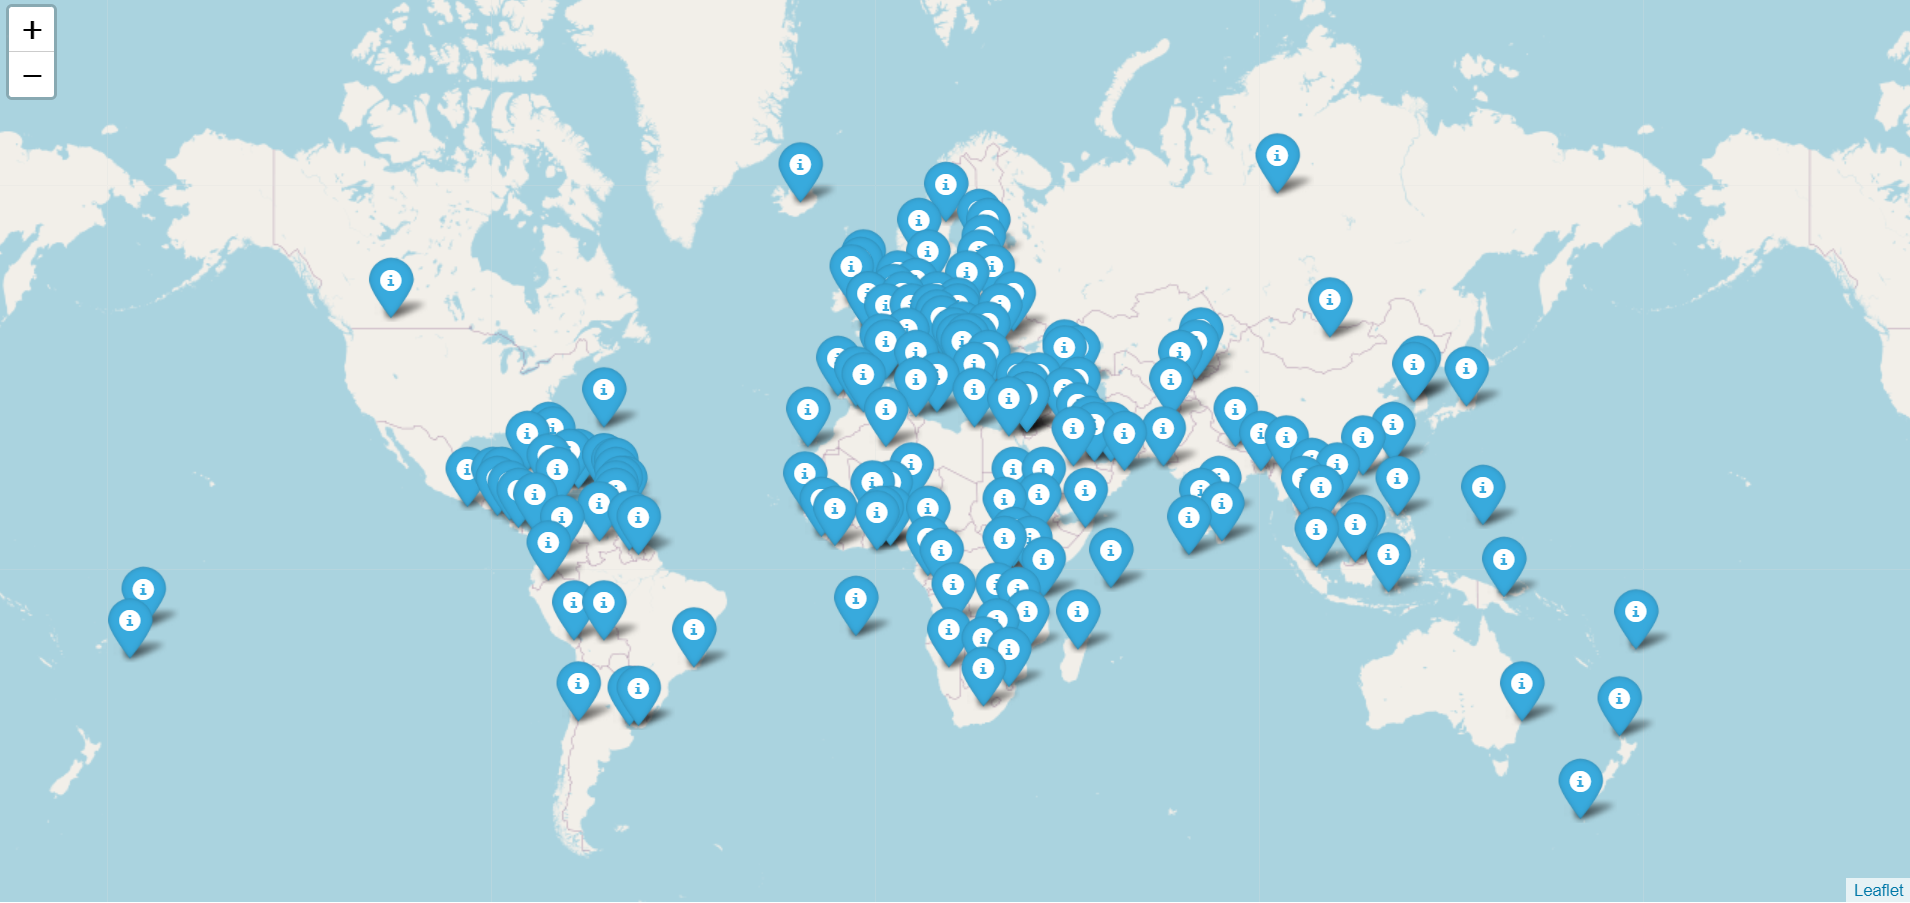


**Карта масштабируется**